In [52]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
import random

# Setup train/test/valid

In [3]:
def separate_test_index(seed=9001,listlen=86,wantnum=7):
    random.seed(seed)
    # define test indices
    testint = ([random.randint(0, listlen-1) for _ in range(wantnum)])
    # list of all indices
    allint = [int(obj) for obj in np.linspace(0,listlen-1,listlen)]
    # filter test indices
    testvalidint = [obj for obj in allint if obj not in testint]
    return testint,testvalidint

In [4]:
# get test index and train-validation indices
testint,testvalidint = separate_test_index()
# Set up seed
random.seed(9001)
# get validation indices
validint = random.sample(testvalidint, 7)
# filter validation indices
trainint = [obj for obj in testvalidint if obj not in validint]

# Process data

In [10]:
path='C:\\Users\\fabau\OneDrive\\Documents\\GitHub\\master-project-cleaned\\data\\time_series_1h_EU\\instantaneous_10m_wind_gust\\instantaneous_10m_wind_gust_max.csv'
timeseries_df = pd.read_csv(path)

# drop the first column
timeseries_df = timeseries_df.drop(columns=[timeseries_df.columns[0]])

# drop the storm index, start date and name columns
timeseries_df = timeseries_df.drop(columns=['storm_index','start_date','storm_name'])

In [11]:
timeseries_df.to_numpy()[trainint,:].shape

(74, 15)

In [12]:
pca = PCA()
pca.fit(timeseries_df)

PCA()

In [13]:
pca.explained_variance_ratio_.cumsum()

array([0.71697623, 0.91712943, 0.95089541, 0.96629503, 0.97629115,
       0.98286672, 0.98780044, 0.99063833, 0.99303696, 0.99502971,
       0.99658111, 0.99774483, 0.99860572, 0.99941338, 1.        ])

In [14]:
pca.transform(timeseries_df)[0]

array([-37.13759997,  34.85490214, -10.87746436,  -6.35669557,
         1.62472942,  -4.27185197,  -5.76420661,  -1.41594356,
         3.86467777,  -0.11562375,   0.06023044,   1.16462664,
        -0.40961606,   0.27909208,  -0.74015035])

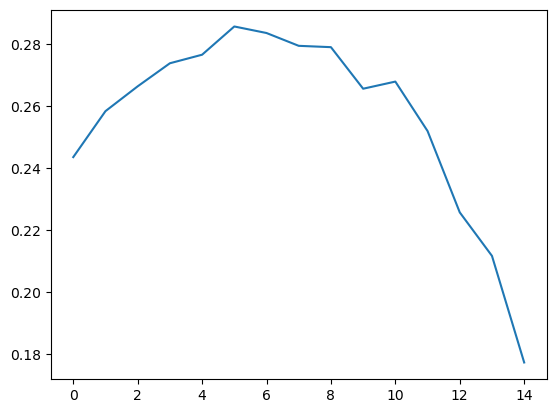

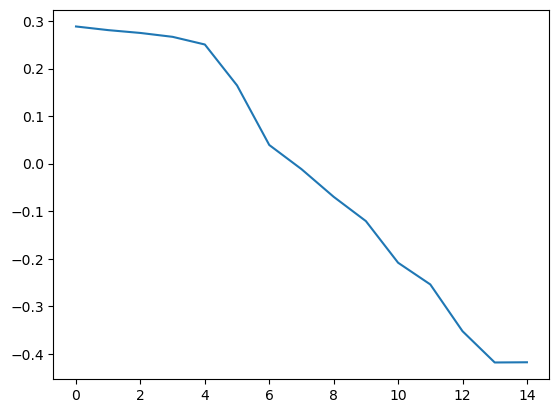

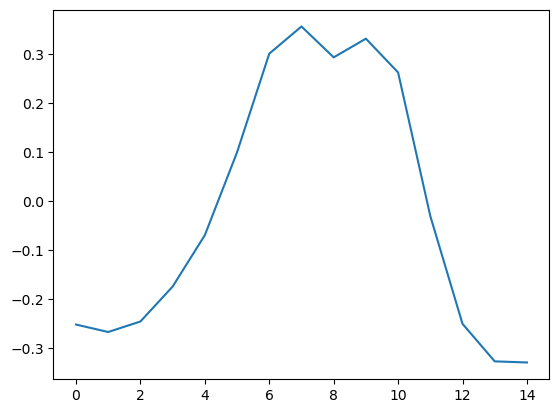

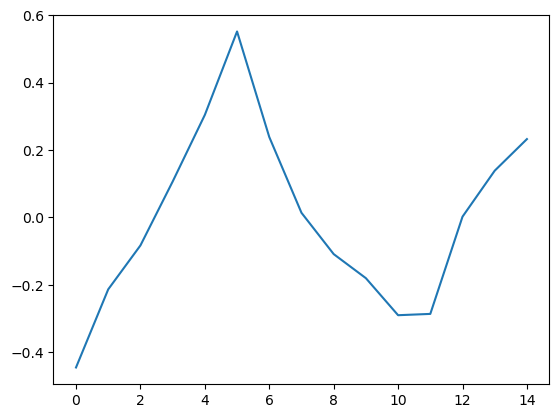

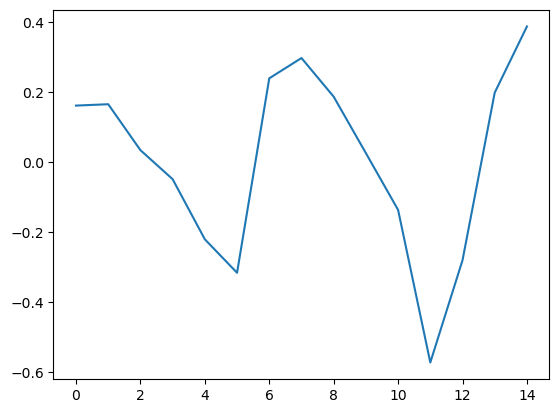

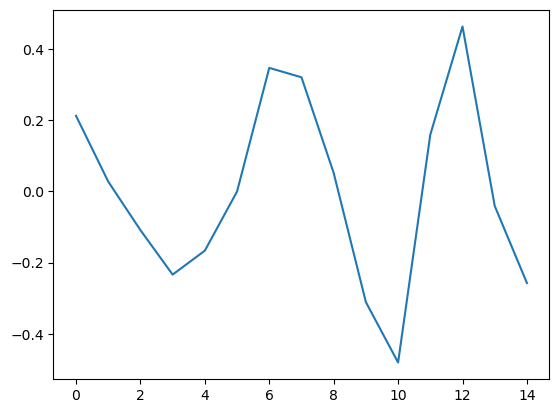

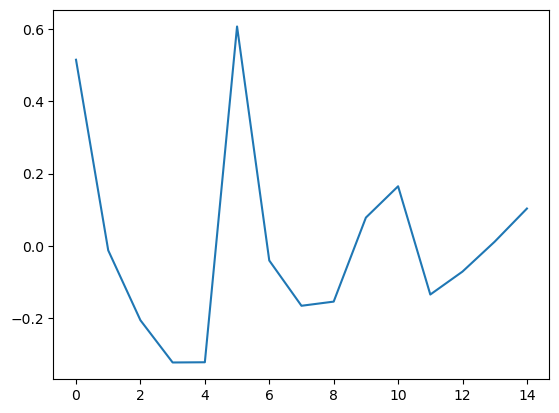

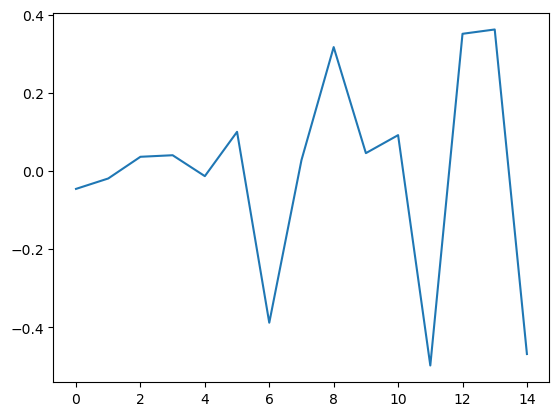

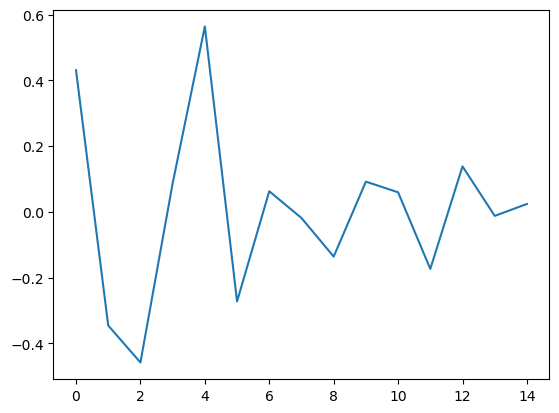

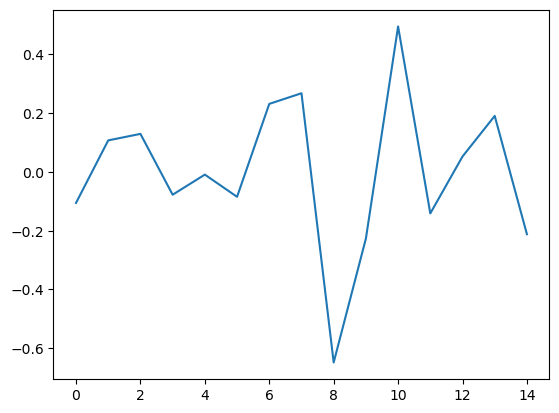

In [17]:
for i in range(0,10):
    plt.plot(pca.components_[i,...])
    plt.show()

In [18]:
pca.transform(timeseries_df)[0,...]

array([-37.13759997,  34.85490214, -10.87746436,  -6.35669557,
         1.62472942,  -4.27185197,  -5.76420661,  -1.41594356,
         3.86467777,  -0.11562375,   0.06023044,   1.16462664,
        -0.40961606,   0.27909208,  -0.74015035])

# function for training set 

In [1]:
import os
import sys
import pandas as pd

path = os.getcwd()
os.chdir(path)

# Add the path to the custom library
custom_library_path = os.path.abspath('util/processing/')
sys.path.append(custom_library_path)

import extraction_squares, time_series

In [ ]:
i10fg_max = pd.read_csv('data/time_series_1h_EU/instantaneous_10m_wind_gust/instantaneous_10m_wind_gust_max.csv')
index_storm_EU = i10fg_max['storm_index'].copy()

storm_index_training, storm_index_test, storm_index_validation = extraction_squares.split_storm_numbers(index_storm_EU)

# order the index of the storms

storm_index_training = storm_index_training.sort_values()
storm_index_test = storm_index_test.sort_values()
storm_index_validation =storm_index_validation.sort_values()

print("Storm Training:", storm_index_training.array[:])
print("Storm Test:", storm_index_test.array[:])
print("Storm Valid:", storm_index_validation.array[:])

Storm Training: <NumpyExtensionArray>
[ 1,  2,  3,  5,  6,  7,  8,  9, 11, 12, 13, 17, 18, 20, 21, 22, 25, 26, 27,
 28, 29, 31, 32, 33, 36, 37, 39, 40, 42, 43, 45, 46, 47, 48, 49, 50, 51, 52,
 53, 56, 57, 58, 60, 61, 63, 66, 67, 69, 70, 77, 78, 80, 82, 83, 84, 85, 86,
 87, 89, 90, 93]
Length: 61, dtype: int64
Storm Test: <NumpyExtensionArray>
[23, 30, 34, 44, 54, 64, 65, 68, 72, 76, 81, 95]
Length: 12, dtype: int64
Storm Valid: <NumpyExtensionArray>
[10, 16, 19, 24, 38, 41, 55, 62, 71, 73, 79, 92, 94]
Length: 13, dtype: int64
68


36
(36, 36)
[[ 0.14505049  0.14637856  0.1578678  ...  0.16910311  0.17048679
   0.17052763]
 [-0.21224015 -0.21574523 -0.18467019 ...  0.28066822  0.28717012
   0.29534606]
 [ 0.34032191  0.34361375  0.2836723  ...  0.17445674  0.19550009
   0.19912789]
 ...
 [-0.04940042  0.0291144   0.07410961 ... -0.13930148 -0.10671518
   0.1009916 ]
 [ 0.16492383 -0.13045859 -0.17682554 ...  0.08735814  0.00205276
  -0.02701948]
 [ 0.02591158 -0.03984839 -0.03857011 ...  0.02062237 -0.06534907
   0.0628155 ]]


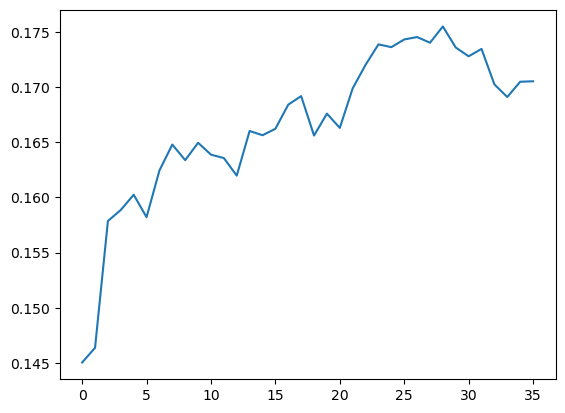

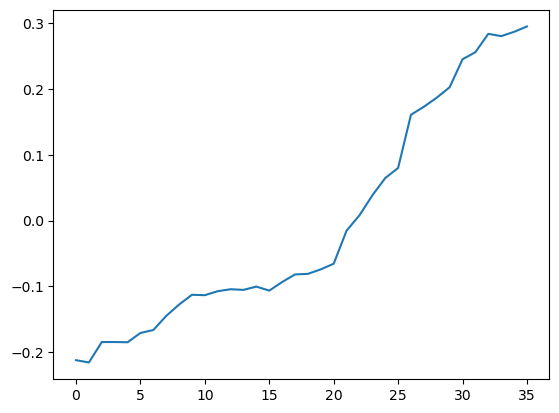

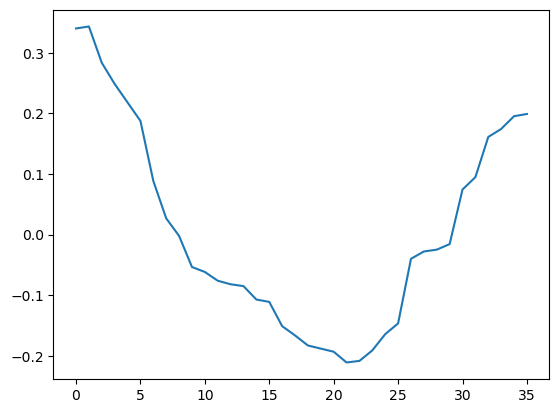

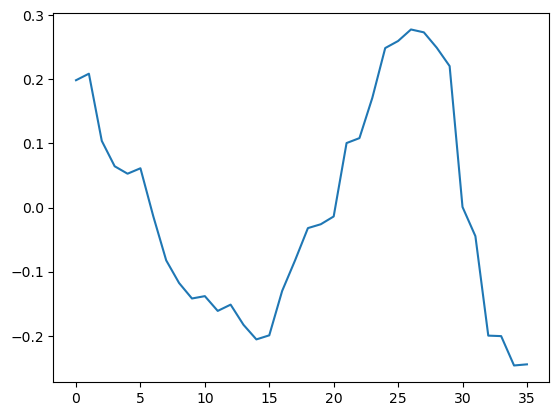

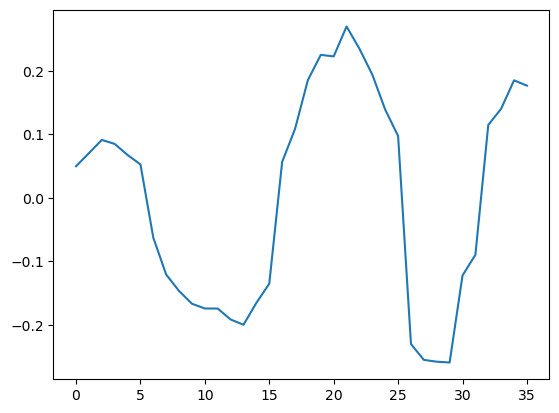

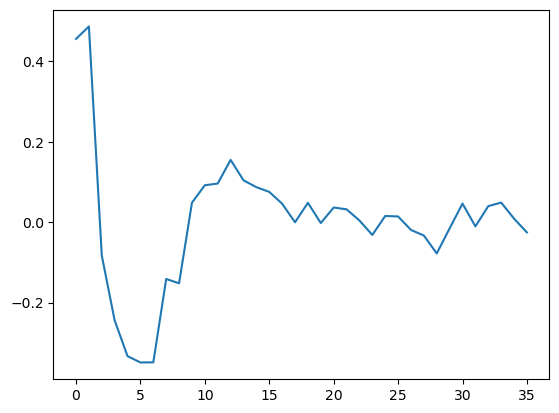

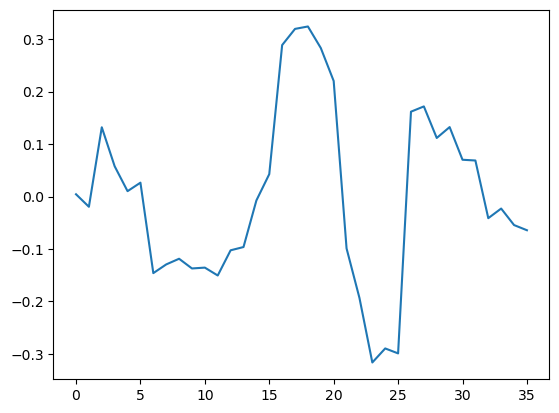

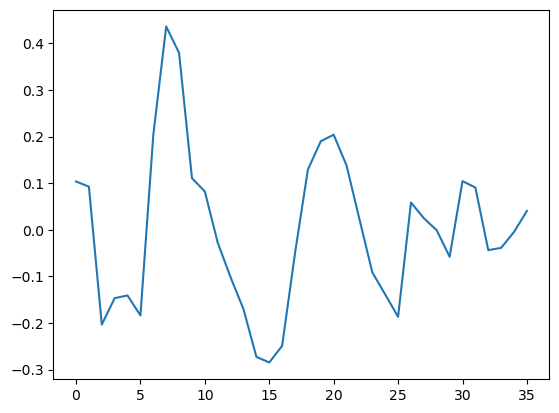

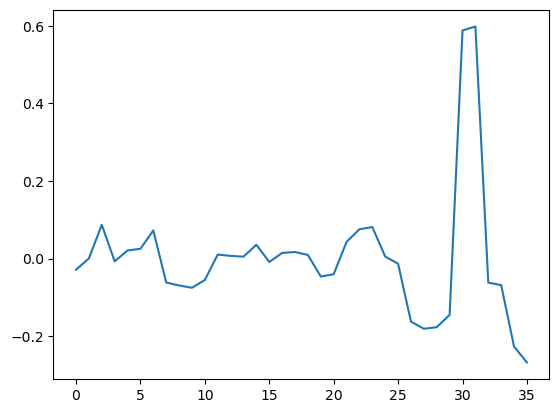

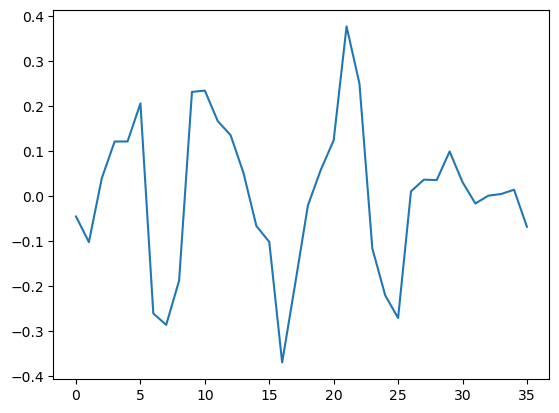

In [63]:
t2m_dewpoint = pd.read_csv('data/time_series_1h_non_EU/2m_dewpoint_temperature/2m_dewpoint_temperature_max.csv')

def get_storms_data(data, storm_index):
    return data.loc[data['storm_index'].isin(storm_index)]

t2m_dewpoint_training = get_storms_data(t2m_dewpoint, storm_index_training)

# drop unneccessary columns
t2m_dewpoint_training = t2m_dewpoint_training.drop(columns=['storm_index','Unnamed: 0'])

pca = PCA()
pca.fit(t2m_dewpoint_training)

# how many components are needed to explain 98% of the variance
pca.explained_variance_ratio_.cumsum()

# transform the data
transformed_data = pca.transform(t2m_dewpoint_training)

print(len(pca.components_))
print(pca.components_[:].shape)
print(pca.components_[:])

# get the eigenvectors
for i in range(0,10):
    plt.plot(pca.components_[i,...])
    plt.show()
